# Space Ship Titanic   
## Kaggle Competition 
[Link](https://www.kaggle.com/competitions/spaceship-titanic/data)

### Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.
File and Data Field Descriptions

   #### train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.  

**HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence. **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.  
**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.  
**Destination** - The planet the passenger will be debarking to.  
**Age** - The age of the passenger.  
**VIP** - Whether the passenger has paid for special VIP service during the voyage.  
**RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.  
**Name** - The first and last names of the passenger.  
**Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.  

#### Initial Thoughts  
+ Simple categorical data - A Tree model is a good place to start  
+ The **Cabin** variable needs to be split into multiple features with port and starboad converted to binary  
+ **PasengerID** may need to be split into group and ID, possibly even an engineered feature for group size  
+ Luxury amentities could be transformed to weather or not a passenger used a facility and total amount spent
+ Name as it exists is useless for categorizing, however breaking it into first and last name and determing if travling in a family unit is more likely to result in transportation is an experiment to run  


## Import Data and Begin Cleaning

In [1]:
import pandas as pd
df = pd.read_csv('data/train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### Look for blank cells

In [9]:
[print(f'The number of nulls in column {i} is {sum(pd.isna(df[i]))}') for i in df.columns]
    

The number of nulls in column PassengerId is 0
The number of nulls in column HomePlanet is 201
The number of nulls in column CryoSleep is 217
The number of nulls in column Cabin is 199
The number of nulls in column Destination is 182
The number of nulls in column Age is 179
The number of nulls in column VIP is 203
The number of nulls in column RoomService is 181
The number of nulls in column FoodCourt is 183
The number of nulls in column ShoppingMall is 208
The number of nulls in column Spa is 183
The number of nulls in column VRDeck is 188
The number of nulls in column Name is 200
The number of nulls in column Transported is 0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

That is a fair number of blanks, maybe we can infer some values

In [12]:
# Start with home planet column
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [15]:
# only 3 values, 'Earth', 'Europa', 'Mars'
dfTerrans = df.loc[df['HomePlanet'] == 'Earth']
dfTerrans

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,0.0,0.0,Lan Mckinsond,True
8682,9272_01,Earth,False,G/1507/P,TRAPPIST-1e,26.0,False,240.0,242.0,510.0,0.0,0.0,Ireene Simson,True
8683,9272_02,Earth,False,F/1894/P,TRAPPIST-1e,21.0,False,86.0,3.0,149.0,208.0,329.0,Gordo Simson,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False


In [17]:
# check cryosleep status for Terrans
dfTerrans['CryoSleep'].value_counts()
#False    3106
#True     1382
#Name: CryoSleep, dtype: int64
# Not definitve enough to infur planetary status

False    3106
True     1382
Name: CryoSleep, dtype: int64

In [18]:
# check VIP status
dfTerrans['VIP'].value_counts()


False    4487
Name: VIP, dtype: int64

In [20]:
# check destination
dfTerrans['Destination'].value_counts()

TRAPPIST-1e      3101
PSO J318.5-22     712
55 Cancri e       690
Name: Destination, dtype: int64

In [66]:
690 / (3101 + 712 + 690)

0.15323117921385743

<Axes: ylabel='Frequency'>

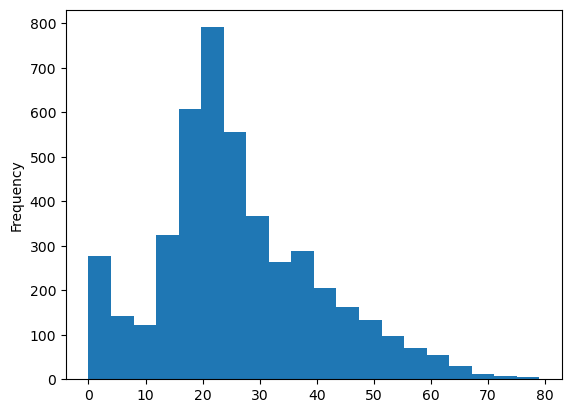

In [59]:
# check age distribution
dfTerrans.Age.plot(kind = 'hist', bins = 20)

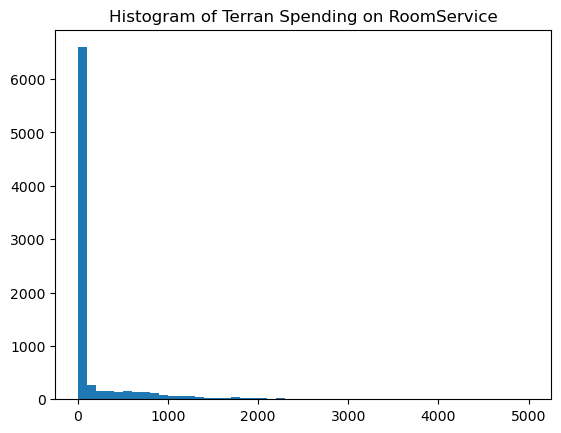

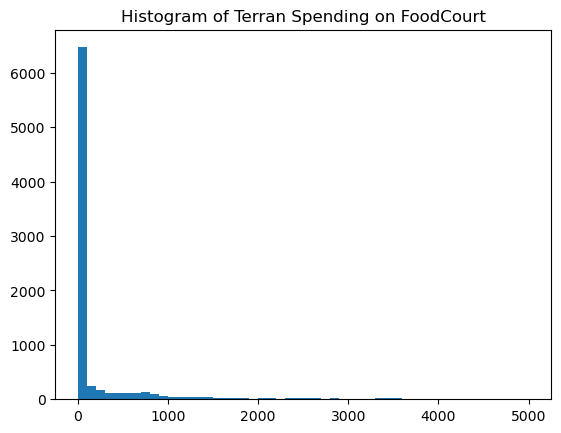

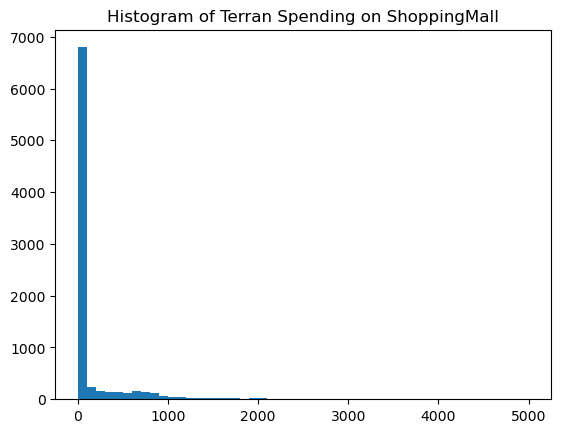

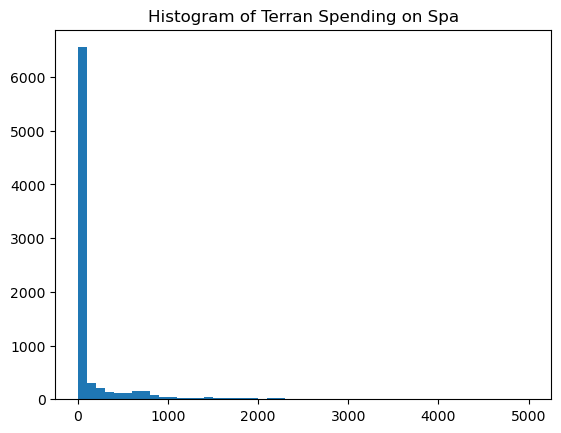

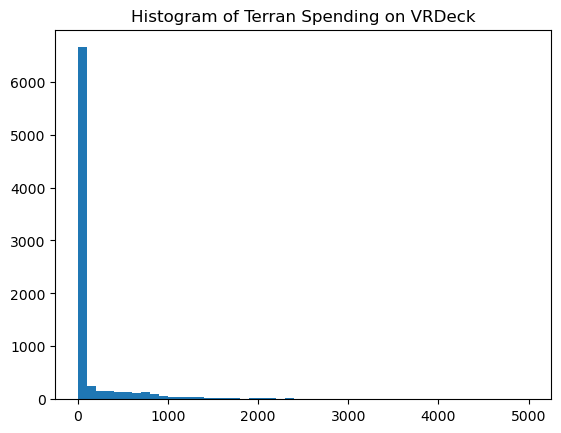

In [28]:
# check distribution of ameneties spending
import matplotlib.pyplot as plt
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa','VRDeck']
for i in amenities:
    plt.figure()
    plt.title(f'Histogram of Terran Spending on {i}')
    plt.hist(df[i], bins = 50, range = (0,5000))
    plt.show()

In [46]:
# check for room location patterns
TerransCabins = pd.DataFrame(dfTerrans.Cabin.str.split("/", expand = True)).rename(columns = {0:'Deck', 1:'Room', 2:'Side'})
[TerransCabins[i].value_counts() for i in TerransCabins.columns]
# no noticible patterns in cabin

[G    2498
 F    1614
 E     395
 Name: Deck, dtype: int64,
 1046    12
 1476    12
 109     11
 1411    10
 383     10
         ..
 1492     1
 160      1
 422      1
 429      1
 1499     1
 Name: Room, Length: 1697, dtype: int64,
 P    2270
 S    2237
 Name: Side, dtype: int64]

### Terran Conclusions
+ 31% chance of cryosleep
+ No Terran in list is a VIP
+ Destination
    - 68.9% are going to TRAPPIST-1e
    - 15.8% going to PSO J318.5-22
    - 15.3 going to 55 Cancri e 
+ Most between 20 and 30, very very few above 63
+ by far most terrans spend 0 on ameneties but equal distribution of low spending on all amenities
+ Only on G,F, and E decks



### Martian Homeplanet 

In [47]:
dfMartians = df.loc[df['HomePlanet'] == 'Mars']
dfMartians

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12,0009_01,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,Berers Barne,True
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False
31,0028_01,Mars,False,F/8/P,TRAPPIST-1e,43.0,False,1125.0,0.0,136.0,48.0,0.0,Ceros Mare,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True
8655,9231_03,Mars,False,E/592/P,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Cus Paie,False
8660,9239_01,Mars,False,E/593/P,TRAPPIST-1e,14.0,False,2.0,0.0,918.0,128.0,0.0,Per Minen,False
8661,9241_01,Mars,False,E/595/P,TRAPPIST-1e,30.0,False,699.0,0.0,600.0,0.0,0.0,Ants Fone,False


In [48]:
# check crysleep status
dfMartians.CryoSleep.value_counts()

False    1047
True      669
Name: CryoSleep, dtype: int64

In [50]:
# check VIP status
dfMartians.VIP.value_counts()

False    1653
True       63
Name: VIP, dtype: int64

In [52]:
# check destination
dfMartians.Destination.value_counts()

TRAPPIST-1e      1475
55 Cancri e       193
PSO J318.5-22      49
Name: Destination, dtype: int64

<Axes: ylabel='Frequency'>

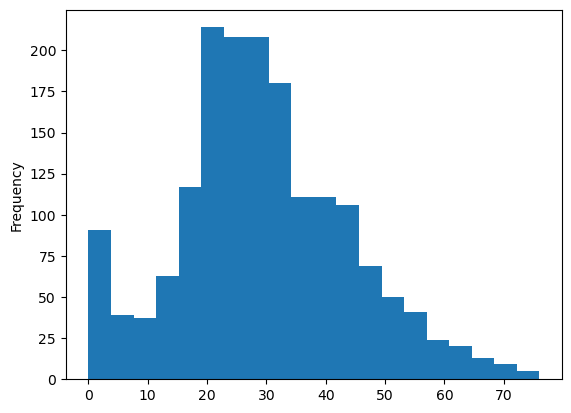

In [58]:
# Check age
dfMartians.Age.plot(kind = 'hist', bins = 20)

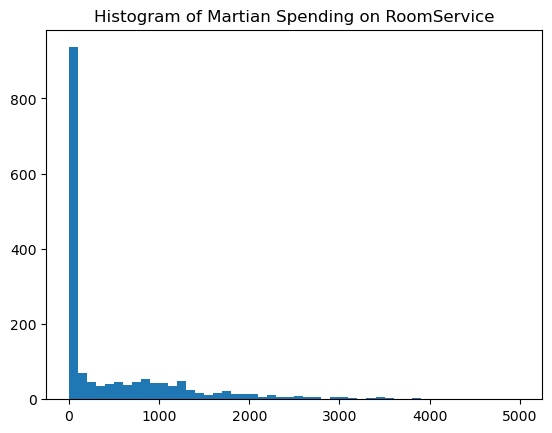

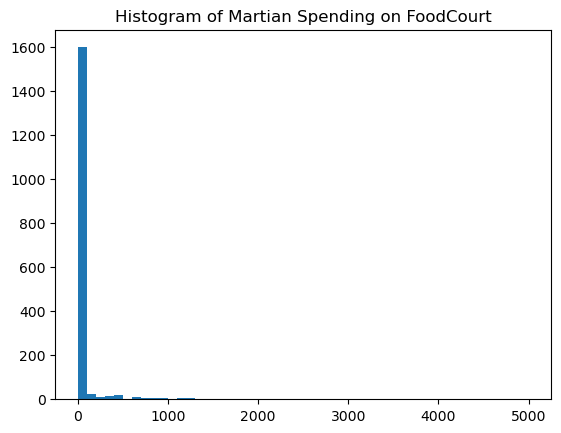

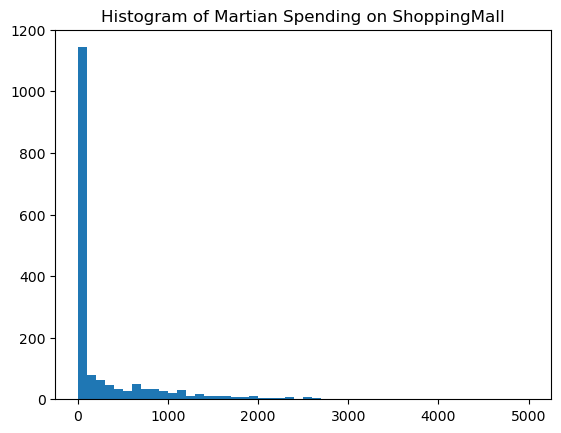

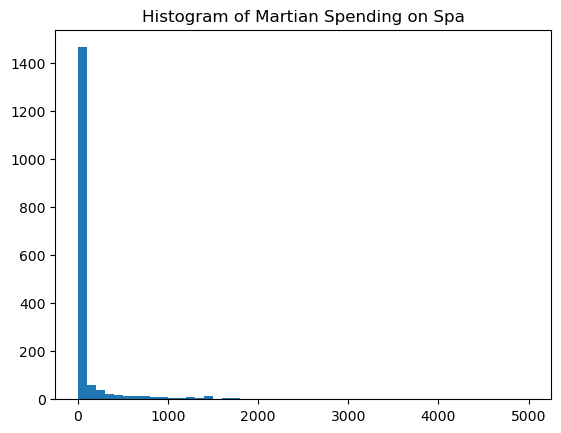

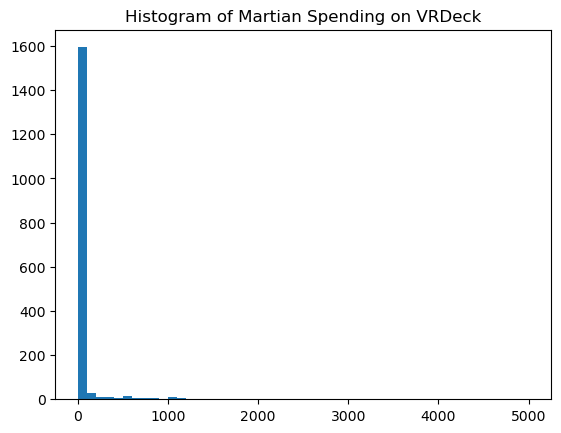

In [60]:
# check amenitites spending
for i in amenities:
    plt.figure()
    plt.title(f'Histogram of Martian Spending on {i}')
    plt.hist(dfMartians[i], bins = 50, range = (0,5000))
    plt.show()

In [61]:
# check cabin distribution
MartianCabins = pd.DataFrame(dfMartians.Cabin.str.split("/", expand = True)).rename(columns = {0:'Deck', 1:'Room', 2:'Side'})
[MartianCabins[i].value_counts() for i in MartianCabins.columns]

[F    1110
 E     330
 D     282
 Name: Deck, dtype: int64,
 124     11
 13       9
 1653     8
 151      8
 176      8
         ..
 333      1
 1026     1
 1100     1
 1102     1
 1793     1
 Name: Room, Length: 949, dtype: int64,
 P    888
 S    834
 Name: Side, dtype: int64]

#### Martian Conclusions
+ 36% Chance of not being in cryosleep
+ 3.8% chance of being a VIP
+ Destination
    - 85% Chance going to TRAPPIST-1e
    - 11% Chance going to 55 Cancri e
    - 3% chance going to PSO J318.5-22
+ Many more 30+ year olds than terrans
+ More likely to spend money on room service and shopping
+ only on F, E, and D decks

#### Europans Homeplanet

In [68]:
dfEuropans = df.loc[df['HomePlanet'] == 'Europa']
dfEuropans

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8687,9275_03,Europa,NaN,A/97/P,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,Atlasym Conable,True
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [69]:
# check cryosleep status
dfEuropans.CryoSleep.value_counts()

False    1162
True      911
Name: CryoSleep, dtype: int64

In [72]:
# check VIP status
dfEuropans.VIP.value_counts()

False    1958
True      131
Name: VIP, dtype: int64

In [74]:
# check destination
dfEuropans.Destination.value_counts()

TRAPPIST-1e      1189
55 Cancri e       886
PSO J318.5-22      19
Name: Destination, dtype: int64

<Axes: ylabel='Frequency'>

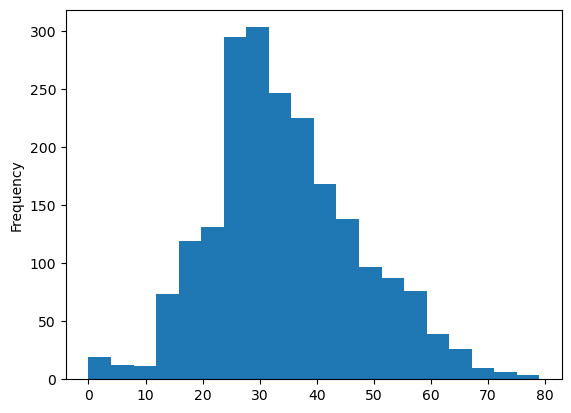

In [78]:
# check age
dfEuropans.Age.plot(kind = 'hist', bins = 20)

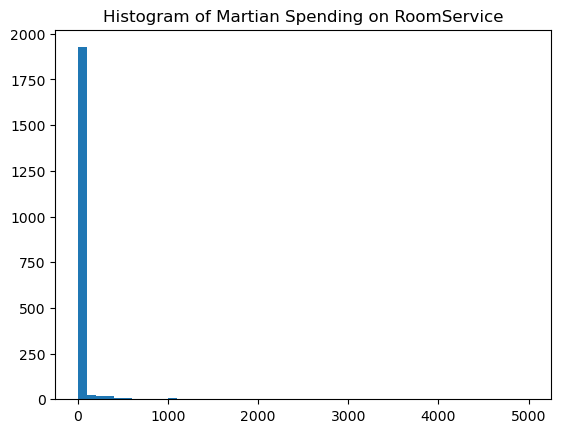

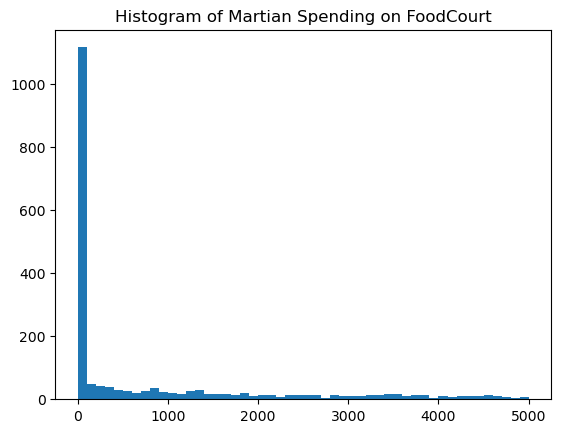

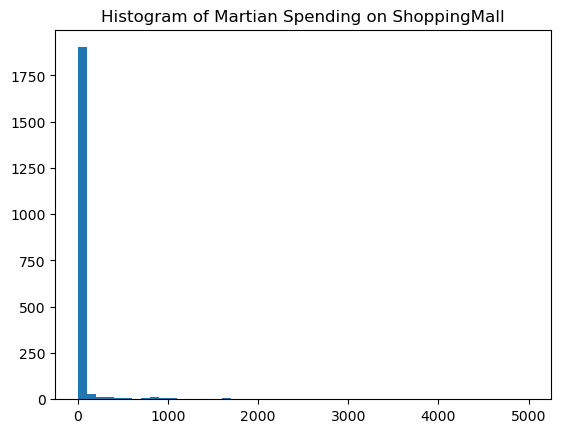

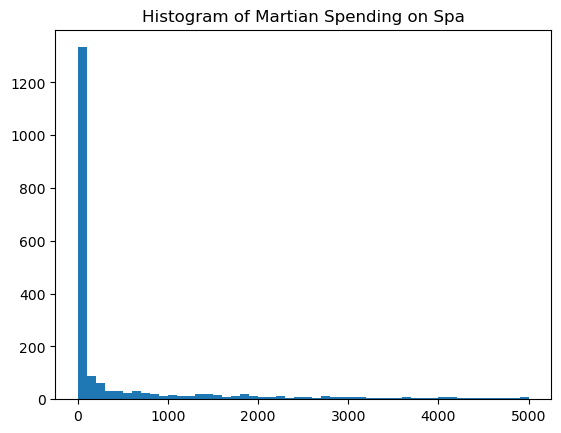

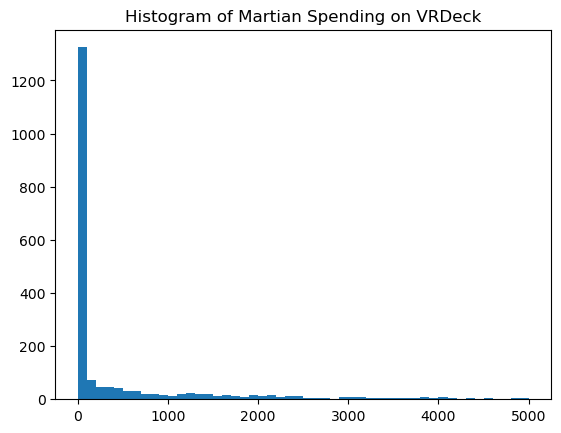

In [80]:
# check amenities spending
for i in amenities:
    plt.figure()
    plt.title(f'Histogram of Martian Spending on {i}')
    plt.hist(dfEuropans[i], bins = 50, range = (0,5000))
    plt.show()

In [81]:
# check cabin distributions
EuropanCabins = pd.DataFrame(dfEuropans.Cabin.str.split("/", expand = True)).rename(columns = {0:'Deck', 1:'Room', 2:'Side'})
[EuropanCabins[i].value_counts() for i in EuropanCabins.columns]

[B    766
 C    734
 A    252
 D    186
 E    128
 T      4
 Name: Deck, dtype: int64,
 82     16
 86     16
 56     15
 65     15
 75     14
        ..
 316     1
 375     1
 556     1
 332     1
 449     1
 Name: Room, Length: 387, dtype: int64,
 S    1115
 P     955
 Name: Side, dtype: int64]

#### Europans Conclusions
+ 43.9% Chance of being in cryosleep
+ 6.3% Chance of being a VIP
+ Destination
    - 56.8 % chance going to TRAPPIST-1e
    - 42.3 % chance going to 55 Cancri e
    - 0.9% chance going to PSO J318.5-22 
+ Age - may not be enough info on age
+ Almost all high spending is by Europans
+ On decks A,B,C,D,E, and T, slightly higher chance of being on starbord side


    